# K-means Clustering
- K-means is an iterative, unsupervised clustering algorithm that groups similar instances together into clusters. The algorithm starts by guessing the initial centroids for each cluster, and then repeatedly assigns instances to the nearest cluster and re-computes the centroid of that cluster.

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt   
from scipy.io import loadmat  
%matplotlib inline

In [6]:
raw_data = loadmat('ex7data2.mat')
X = raw_data['X']

### Finding the nearest centroid

In [16]:
def find_nearest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    for point in range(m):
        min_distance = 1000000
        for c in range(k):
            distance = np.sum((X[point, :] - centroids[c, :]) ** 2)
            if distance < min_distance:
                min_distance = distance
                idx[point] = c
    return idx

def compute_centroids(X, idx, k):  
    m, n = X.shape
    centroids = np.zeros((k, n))

    for i in range(k):
        indices = np.where(idx == i)
        centroids[i, :] = (np.sum(X[indices, :], axis=1) / len(indices[0])).ravel()

    return centroids

def run_k_means(X, initial_centroids, max_iters):  
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids

    for i in range(max_iters):
        idx = find_nearest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)

    return idx, centroids

In [17]:
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx, centroids = run_k_means(X, initial_centroids, 100)  

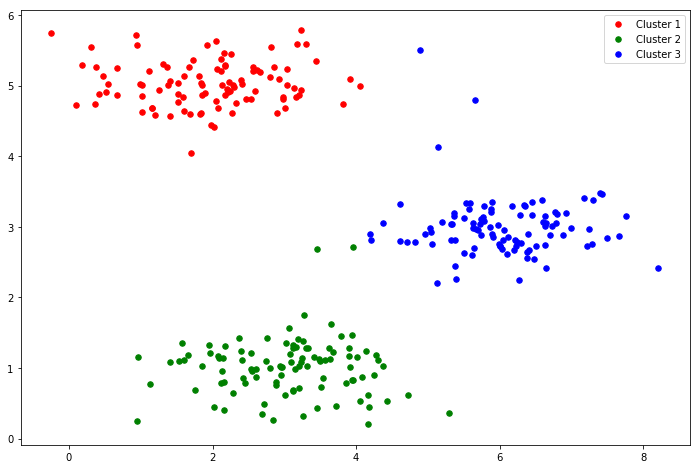

In [34]:
cluster_one = X[np.where(idx == 0)[0], :]
cluster_two = X[np.where(idx == 1)[0], :]
cluster_three = X[np.where(idx == 2)[0], :]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(cluster_one[:,0], cluster_one[:,1], s=30, color='r', label='Cluster 1')  
ax.scatter(cluster_two[:,0], cluster_two[:,1], s=30, color='g', label='Cluster 2')  
ax.scatter(cluster_three[:,0], cluster_three[:,1], s=30, color='b', label='Cluster 3')  
ax.legend()  